# Lab 1 (QMSS5015 Data Analysis)
**Submitted by**: Gideon Tay\
**My UNI**: gt2528\
**Contact me at**: gideon.tay@columbia.edu

## Loading the data and importing libraries
For this lab, I downloaded a TSV file from [this website](https://www.icpsr.umich.edu/web/ICPSR/studies/38163/datadocumentation). This TSV file contains data from the 2017-2018 Japanese General Social Survey (JGSS). 

**Citation:** Iwai, Noriko, Shishido, Kuniaki, Sasaki, Takayuki, and Iwai, Hachiro. Japanese General Social Survey (JGSS) Integrated Data, 2017-2018. Inter-university Consortium for Political and Social Research [distributor], 2023-08-08. https://doi.org/10.3886/ICPSR38163.v1

In [1]:
# import libraries needed for this lab assignment
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Read tsv file
df = pd.read_csv('JGSS_2017-2018_Data.tsv', sep='\t')

C:\Users\gideo\AppData\Local\Temp\ipykernel_3668\2535690286.py:8: DtypeWarning: Columns (167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,335,338,402,403,404) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('JGSS_2017-2018_Data.tsv', sep='\t')


## 1-- Choose one variable, look at its distribution (mean, sd, median, min, max), or if it is categorical, create a simple table for it, and plot it with a histogram.  Explain what you take away from looking at the variable.

### Choosing the variable and preparing the data

I choose the variable `WLKEEPJA`. This is question 15 of the JGSS questionnaire, which states: *Are you considering quitting your current job (your business)?*

Based on the codebook (alternatively, view [this website](https://www.icpsr.umich.edu/web/ICPSR/studies/38163/datasets/0001/variables/WLKEEPJA?archive=icpsr)), the possible responses to the question along with their corresponding numeric values in the dataset are shown below:

| Numeric value   | Label     |
|--------------|--------------|
| 1   | I am considering quitting in the near future   |
| 2   | I am not considering quitting (now)   |
| 3   | I am not considering quitting at all   |
| 4   | Don't know   |
| 8   | Not applicable   |
| 9   | No answer	   |

To display the results more intuitively, I create a separate column `WLKEEPJA_str` of strings, which converts the numeric values in `WLKEEPJA` to their corresponding responses. Note that I do not include a mapping for 8 since I only want to consider those who are currently working (ignore those who responded 'Not applicable'). Also, since all respondents answered this question (see [here](https://www.icpsr.umich.edu/web/ICPSR/studies/38163/datasets/0001/variables/WLKEEPJA?archive=icpsr)), we do not need to include 9 in the response mapping.

In [2]:
# Mapping of numeric values to their corresponding strings
response_mapping = {
    1: 'I am considering quitting in the near future',
    2: 'I am not considering quitting (now)',
    3: 'I am not considering quitting at all',
    4: 'Don\'t know'
}

# Apply the mapping to the WLKEEPJA column
df['WLKEEPJA_str'] = df['WLKEEPJA'].map(response_mapping)

### Look at the variable's distribution

Now, look at the distribution of `WLKEEPJA`. Since it is a categorical and not continuous variable, we will not use `describe()` as means, standard deviations, minimums and maximums makes little sense here. Instead, we produce a simple table of raw counts of each response:

In [3]:
# Create a count table for each response in 'WLKEEPJA'
WLKEEPJA_count = df['WLKEEPJA_str'].value_counts().sort_index()

# Display it nicely. Broke code into 2 lines for better readability
WLKEEPJA_count.reset_index().style.hide(axis='index')

WLKEEPJA_str,count
Don't know,28
I am considering quitting in the near future,153
I am not considering quitting (now),728
I am not considering quitting at all,761


We may also want to see the distribution of responses as proportions:

In [4]:
# Get distribution of responses as proportions
WLKEEPJA_prop = df['WLKEEPJA_str'].value_counts(normalize=True).sort_index()*100

# Display the table with the index hidden for aesthetic purposes
WLKEEPJA_prop.reset_index().style.hide(axis='index')

WLKEEPJA_str,proportion
Don't know,1.676647
I am considering quitting in the near future,9.161677
I am not considering quitting (now),43.592814
I am not considering quitting at all,45.568862


Let's visualize the data with a histogram:

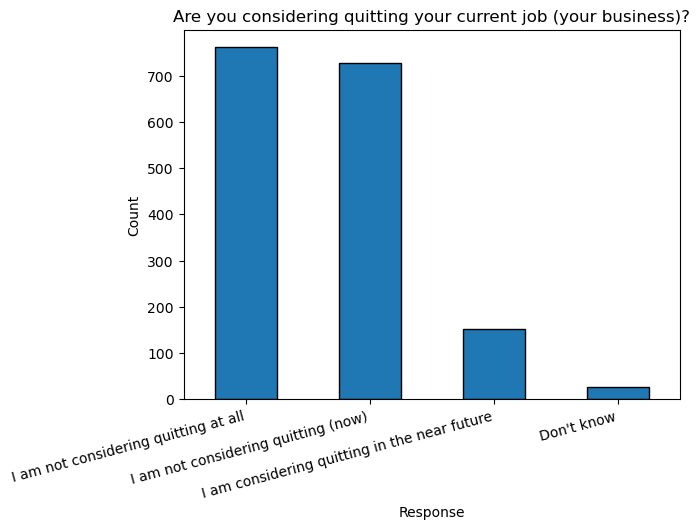

In [5]:
# Plot a bar chart
df['WLKEEPJA_str'].value_counts().plot(kind='bar', edgecolor='black')

# Add title and labels
plt.title('Are you considering quitting your current job (your business)?')
plt.xlabel('Response')
plt.ylabel('Count')

# Rotate x-axis labels for better readability and aligns the labels to the right
plt.xticks(rotation=15, ha='right')  

# Display the plot
plt.show()

**Key takeaway:** Assuming that JGSS's sample is representative of Japanese society, it seems like a large percentage (45.6%) of Japanese do not consider quitting their current job at all. This is the most common response. This could suggest that the culture of lifetime employment in Japan, where workers work for a single company and stay there until retirement, still seems to hold in 2017-2018 when the data was collected. 

There is also a large percentage (43.6%) who are not considering quitting now, implicitly suggesting that they are open to consider quitting some time in the future. This is the second most common response. There are fewer people (9.2%) considering quitting in the near future and few (1.7%) who don't know or are unsure about their attitudes toward quitting. 

This is not surprising. At any point in time, only a small percentage of workers are considering quitting in the near future, and an overwhelming majority either intend to stay at their current job for the medium (43.6%) or long term (45.6%).


## 2-- Choose some continuous-ish variable, and calculate its mean and standard deviation by some grouping variable.  Plot it using a box-plot.  Explain what conclusion you draw from this analysis.

### Choosing the variables and preparing the data

For the continuous-ish variable, I choose the variable `XJOBYR`. This is question 10 of the JGSS questionnaire, which states: *How many years have you been working for the corporation or organization you currently work at? If you are self-employed, give the number of years self-employed.*

The codebook states that the mean response to this question was 13.96 years and the standard deviation was 13.19 years ([see here](https://www.icpsr.umich.edu/web/ICPSR/studies/38163/datasets/0001/variables/XJOBYR?archive=icpsr)).

Note that some respondents wrote not applicable (denoted by 888 in the dataset) and some did not answer (denoted by 999). Refer to the codebook for details. We deal with this by replacing `888` and `999` with `NaN` in the `XJOBYR` column.

In [6]:
# Replace 888 (denotes 'not applicable') and 999 (denotes 'no answer') with NaN
df['XJOBYR'] = df['XJOBYR'].replace({888: np.nan, 999: np.nan})

For the grouping variable, I choose `ST5JOB`. This is question 14 of the JGSS questionnaire, which states: *On the whole, how satisfied are you with the (main) job you have?*

Based on the codebook (alternatively, view [this website](https://www.icpsr.umich.edu/web/ICPSR/studies/38163/datasets/0001/variables/ST5JOB?archive=icpsr)), the possible responses to the question along with their corresponding numeric values in the dataset are shown below:

| Numeric value   | Label     |
|--------------|--------------|
| 1   | Satisfied   |
| 2   | Somewhat satisfied   |
| 3   | Neither satisfied nor dissatisfied   |
| 4   | Somewhat dissatisfied   |
| 5   | Dissatisfied   |
| 6   | Don't know   |
| 8   | Not applicable   |
| 9   | No answer	   |

Like in question 1, I create a separate column `ST5JOB_str` which converts the numeric values in `ST5JOB` to their corresponding responses. Again, we do not include a mapping for 8 since I only want to consider those who are currently working (ignore those who responded 'Not applicable'). Also, since all respondents answered this question and there are zero "Don't know" responses (see [here](https://www.icpsr.umich.edu/web/ICPSR/studies/38163/datasets/0001/variables/ST5JOB?archive=icpsr)), we do not need to include 6 and 9 in the response mapping.

In [7]:
# Mapping of numeric values to their corresponding strings
response_mapping_ST5JOB = {
    1: 'Satisfied',
    2: 'Somewhat satisfied',
    3: 'Neither satisfied nor dissatisfied',
    4: 'Somewhat dissatisfied',
    5: 'Dissatisfied'
}

# Apply the mapping to the ST5JOB column
df['ST5JOB_str'] = df['ST5JOB'].map(response_mapping_ST5JOB)

# Convert ST5JOB_str to a categorical type with an ordered category
ordered_categories = ['Satisfied', 'Somewhat satisfied', 
                      'Neither satisfied nor dissatisfied', 
                      'Somewhat dissatisfied', 'Dissatisfied']
df['ST5JOB_str'] = pd.Categorical(df['ST5JOB_str'], 
                                  categories=ordered_categories, 
                                  ordered=True)

### Mean of years in current organization grouped by job satisfaction

Now, I calculate the mean of continuous-ish variable `XJOBYR` by the grouping variable `ST5JOB_str`:

In [8]:
# Calculate mean of XJOBYR, grouped by ST5JOB_str
XJOBYR_grouped = df.groupby(['ST5JOB_str'], observed = True)['XJOBYR'].mean()

# Display it nicely. Broke code into 2 lines for better readability
XJOBYR_grouped.reset_index().style.hide(axis='index')

ST5JOB_str,XJOBYR
Satisfied,16.232932
Somewhat satisfied,13.657754
Neither satisfied nor dissatisfied,11.800654
Somewhat dissatisfied,10.800000
Dissatisfied,15.576923


**Key takeaway:** Generally, we see that the more satisfied a worker is with his job, the higher the mean number of years the worker has been in the organization. There is an exception to this trend, where dissatisfied workers have a high mean of 15.6 years in the organization.

Intuitively, we expect workers who are dissatisfied with their job to leave their organization earlier (push factors in job decisions), while those who are satisfied with their job would stay in the organization for a longer time period. Hence, the observed trend is expected. I am unsure as to the explanation behind the exception in the trend seen among 'dissatisfied' workers.

### Standard deviation of years in current organization grouped by job satisfaction

Now, I calculate the standard deviation of continuous-ish variable `XJOBYR` by the grouping variable `ST5JOB_str`:

In [9]:
# Calculate std of XJOBYR, grouped by ST5JOB_str
XJOBYR_std_grouped = df.groupby(['ST5JOB_str'], observed = True)['XJOBYR'].std()

# Display it nicely. Broke code into 2 lines for better readability
XJOBYR_std_grouped.reset_index().style.hide(axis='index')

ST5JOB_str,XJOBYR
Satisfied,14.084752
Somewhat satisfied,13.255717
Neither satisfied nor dissatisfied,11.382880
Somewhat dissatisfied,10.773667
Dissatisfied,14.653800


**Key takeaway:** Standard deviations are very high across all groups, relative to the mean values. This suggests that although we observed some form of a trend in the mean, the differences in means between groups is unlikely to be statistically signficant. In other words, there is unlikely to be a statistically signficant relationship between job satisfaction and number of years a worker has been in a current organization at a fixed point in time.

### Boxplot

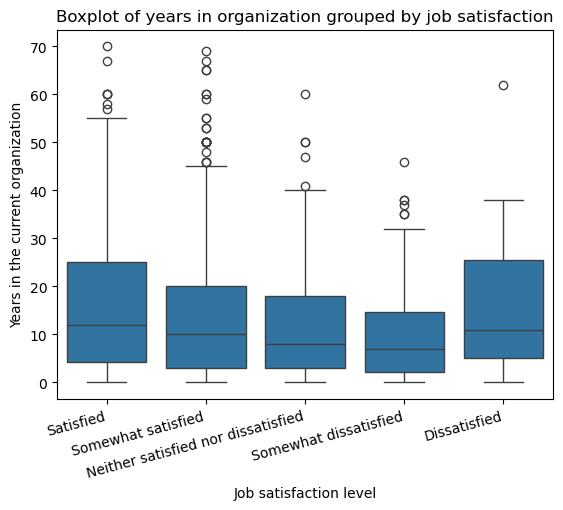

In [10]:
sns.boxplot(data=df, x="ST5JOB_str", y="XJOBYR")

# Add title and labels
plt.title('Boxplot of years in organization grouped by job satisfaction')
plt.xlabel('Job satisfaction level')
plt.ylabel('Years in the current organization')

# Rotate the x-axis ticks
plt.xticks(rotation=15, ha='right')

# Show the plot
plt.show()

**Key takeaway:** As with our analysis on means, it appears from the boxplot that with the exception of the 'Dissatisfied' plot, there is a trend in medians where more satisfied workers have more years in the current organization. However, the large interquartile ranges and ranges across all responses means that this trend is unlikely to be statistically signficant. The interquartile ranges across the boxplots have significant overlaps.

## 3-- Choose two categorical-ish variables, and cross-tabulate them.  Plot them using a stacked bar chart.  Explain what conclusion you draw from this analysis.

### Cross-tabulation

I choose the categorical-ish variables `WLKEEPJA` (quitting intentions) used in question 1 and `ST5JOB` (job satisfaction) used in question 2. I will work with the decoded `WLKEEPJA_str` and `ST5JOB_str` columns I prepared in my response to previous questions.

By cross-tabulating them, I want to answer the question: *Do workers who are more dissatisfied with their current jobs tend to have intentions to quit sooner rather than later?*. Intuitively, the answer should be yes. We confirm this with the data:

In [11]:
pd.crosstab(df.WLKEEPJA_str, df.ST5JOB_str, normalize='columns')*100

ST5JOB_str,Satisfied,Somewhat satisfied,Neither satisfied nor dissatisfied,Somewhat dissatisfied,Dissatisfied
WLKEEPJA_str,,,,,
Don't know,1.002004,1.335113,3.594771,2.222222,0.000000
I am considering quitting in the near future,5.811623,6.809079,12.745098,30.000000,26.923077
I am not considering quitting (now),27.655311,47.396529,57.189542,51.111111,53.846154
I am not considering quitting at all,65.531062,44.459279,26.470588,16.666667,19.230769


### Stacked bar chart

It is rather difficult to visualize the data in the table to draw a conclusion. Let's visualize the data with a stacked bar chart. I made this function to generate a stacked bar graph, where each bar goes to 100%. I used the function in the example given in the lecture as a base and improved on it:


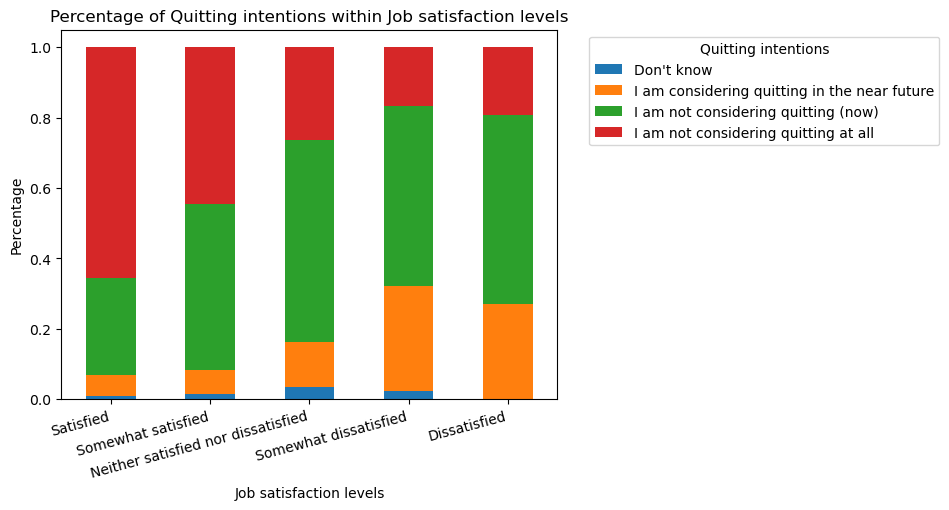

In [12]:
def plot_grouped_percentage(df, group_vars, x_label, y_variable):
    """
    This function groups the dataframe by the provided variables, calculates
    the percentage for each group, and plots a stacked bar chart where each bar 
    sums to 100%.

    Parameters:
    df: pandas DataFrame
    group_vars: list of strings, variable names to group by
    x_label: string of x-axis label
    y_variable: short string describing the other variable
    """

    # Group by the variables provided in the group_vars list and count occurrences
    group_counts = df.groupby(group_vars, observed=True).size().unstack()

    # Normalize to get the percentage (each bar sums to 100%)
    group_percentages = group_counts.div(group_counts.sum(axis=1), axis=0)

    # Plot the normalized percentages as a stacked bar chart
    group_percentages.plot(kind='bar', stacked=True)
    plt.ylabel('Percentage')
    plt.xlabel(x_label)
    plt.title(f'Percentage of {y_variable} within {x_label}')
    
    # Rotate the x-axis ticks 
    plt.xticks(rotation=15, ha='right')
    
    # Move the legend outside the plot area
    plt.legend(title=y_variable, bbox_to_anchor=(1.05, 1), loc='upper left')

    # Show the plot
    plt.show()

# Example usage
plot_grouped_percentage(df, ['ST5JOB_str', 'WLKEEPJA_str'], 
                        'Job satisfaction levels', 'Quitting intentions')

### Conclusions drawn
**Key takeaways:**
1. Firstly, the more satisfied workers are with their job, the more likely they are to not consider quitting at all. This is seen by the large red chunks on the left that decrease in size as you move rightwards across the plot.
    * For example, a large percentage (65.5%) of workers 'satisfied' with their job do not consider quitting at all. This figure is much smaller among 'somewhat dissatisfied' workers (16.7%).
    * However, this trend breaks with 'dissatisfied' workers. 19.2% of them do not consider quitting at all, a larger percentage compared to 'somewhat dissatisfied' workers.

2. Similarly, the more dissatisfied workers are with their job, the more likely they are to consider quitting in the near future. This is seen by the small orange chunks on the left that increase in size as you move rightwards across the plot.
    * For example, a small percentage of workers (5.8%) 'satisfied' with their job consider quitting in the near future. This figure is much larger among 'somewhat dissatisfied' workers (30.0%).
    * Again, this trend breaks with 'dissatisfied' workers. 26.9% of them consider quitting in the near future, a figure less than that of the 'somewhat dissatisfied' workers.

3. Taken together, this supports our initial hypothesis and expectation that workers who are more dissatisfied with their current jobs tend to have intentions to quit sooner rather than later. Similarly, workers who are more satisfied with their current jobs tend to have no intentions to quit at all.

4. I posit that the 'Dissatisfied' group breaks these trends, in both our analysis in for question 2 and 3, due to a relatively small sample size of 26 compared to the other groups (see below). This means that answers by a few atypical responders who answered 'Dissatisfied' could greatly affect the percentages studied.

In [13]:
# Count for each possible response to job satisfaction levels
ST5JOB_str_count = df['ST5JOB_str'].value_counts().sort_index()

# Display it nicely. Broke code into 2 lines for better readability
ST5JOB_str_count.reset_index().style.hide(axis='index')

ST5JOB_str,count
Satisfied,499
Somewhat satisfied,749
Neither satisfied nor dissatisfied,306
Somewhat dissatisfied,90
Dissatisfied,26
